# Relación entre temperatura y estado lógico de un sistema

## 1. Introducción
Se desea diseñar un sistema digital integrado en la base de un envase o pieza de cristalería que:

* Mida la temperatura en la base del recipiente.

* Detecte un descenso significativo de temperatura causado por la presencia de un líquido frío (por ejemplo, con hielo).

* Active una señal luminosa (LED) cuando dicha condición ocurra.

La idea es comprender la relación entre temperatura, voltaje y estado lógico del sistema mediante **simulación computacional**. Para ello se evalúa lógicamente una condición térmica y se toma una decisión binaria con base a: *¿La temperatura es suficientemente baja como para considerar que hay un líquido frío?.*


## 2. Objetivo

Diseñar un sistema lógico-electrónico que reciba como entrada una señal binaria proveniente de un comparador térmico y genere como salida la activación de un LED cuando se detecte una temperatura baja.

El diseño debe justificarse usando **proposiciones lógicas, tablas de verdad y puertas lógicas**, y luego simularse o implementarse físicamente en un circuito.


Desarrolle un notebook con código Python que illustre de forma visual e interactiva el funcionamiento de un sistema que:

- Mide temperatura mediante el modelado de algún tipo de sensor de temperatura, por ejemplo sensor LM35,
- Interactivamente compara la temperatura medida contra un umbral especificado mediante algún elemento grafico simulando a un circuito comparador (e.g. LM35),
- Enciende un LED cuando la temperatura baja de un valor de referencia.


### 3. Definición de problema


#### 3.1 En términos lógicos
Definimos las siguientes proposiciones:

* $T:$ La temperatura medida $T_{LM35}$ es menor que el umbral de temperatura frío definido $T_{ref}$.
* $LED_{ON}:$ El LED está encendido.

El comportamiento requerido del sistema es:
$ LED_{ON} \iff T$

Tabla de verdad del comportamiento esperado
| (T) (temperatura baja) | ($LED_{ON}$) (LED encendido) |
| ---------------------- | ------------------- |
| 0 (No)                 | 0 (Apagado)         |
| 1 (Sí)                 | 1 (Encendido)       |




### 3.2 Modelado del sensor/comparador de temperatura

El sensor de temperatura LM35 entrega $V_{LM35}$ dada la temepratura $T_{LM35}$:

$V_{LM35} = 10 \times T_{LM35}$ mV/ºC

Ejemplos:

$T_{LM35}=25$ °C → $V_{LM35} = 250$ mV

$T_{LM35}=10$ °C → $V_{LM35} = 100$ mV

Para comparación de temperatura se puede utilizar un **amplificador operacional** como comparador (e.g. LM358) con las siguientes estradas:
* Entrada no inversora (+): $V_{LM35}$ voltaje del sensor de temperatura LM35  dada la temperatura.
* Entrada inversora (–): voltaje de referencia ajustado con potenciómetro a $V_{ref}$, temperatura umbral.

Cuando:

$V_{LM35}  < V_{ref} \implies T_{low} \implies LED_{ON}$

## 4. Implementación en Python

Librerias importadas:
* ipywidgets: Permite crear elementos interactivos dentro del notebook, como deslizadores (FloatSlider). Esto es crucial para la simulación interactiva donde el usuario puede modificar la temperatura y ver los cambios en tiempo real.

* IPython.display: Proporciona herramientas para manipular la visualización de la salida en entornos como IPython y Google Colab. La función `clear_output` esclave y se utiliza para actualizar dinámicamente la salida del widget interactivo sin acumular contenido.

### 4.1 Simulación estática

Esta sección presenta una simulación estática del sistema sensor de temperatura y LED. Su propósito es mostrar el comportamiento ideal y predecible del sistema en un rango fijo de temperaturas, antes de introducir elementos interactivos o dinámicos.



In [22]:
# Librerias de graficación y visualización
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output

In [ ]:
T_ref = 15.0                 # Umbral de temperatura en °C, umbral de frio
T = np.linspace(0, 30, 300)  # Número de muestras del sensor: 300 puntos de 0 a 30 grados Celsius, es un vector con 300 temperaturas

Observe que $T_{ref}$ es el umbral crítico en grados Celsius y representa la temperatura por debajo de la cual el LED debe encenderse.

En este caso, actúa como el criterio para activar o desactivar el LED, simulando una alarma o un indicador visual cuando la temperatura desciende a un nivel predefinido.



In [ ]:
# Modelado del sensor de temperatura
V_sensor = 0.01 * T

# Modelado lógico del sistema
LED = (T < T_ref).astype(int)
#Evalúa condición booleana (True / False)
#La convierte en 1 o 0
#astype(int) limpia datos de float a int
# 1 es true va a prender el LED 
# 0 es false

* Gráfico "Voltaje del sensor (V) vs Temperatura (°C)":
Muestra la relación lineal directa entre la temperatura y el voltaje de salida del sensor. A medida que la temperatura aumenta, el voltaje del sensor también lo hace.
La línea vertical punteada indica el T_ref (umbral de 15°C), que es el punto clave para la activación del LED.

* Gráfico "Estado del LED (1 = ON, 0 = OFF) vs Temperatura (°C)":
Este gráfico de tipo "step" (escalón) ilustra claramente el comportamiento lógico del LED.
Cuando la temperatura está por debajo de T_ref (15°C), el LED está encendido (valor 1).
Cuando la temperatura alcanza o supera T_ref, el LED se apaga (valor 0).
Esto permite visualizar cómo el sistema responde al cruzar el umbral de temperatura.

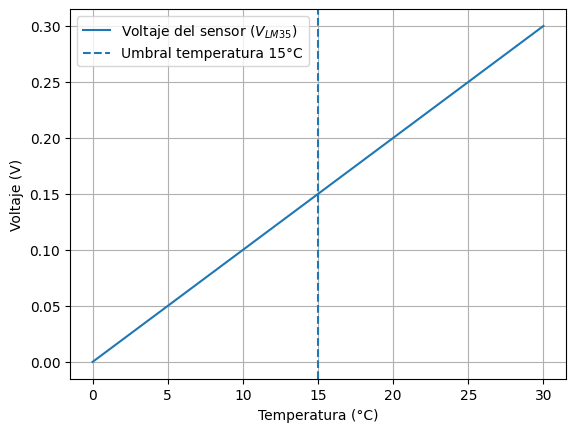

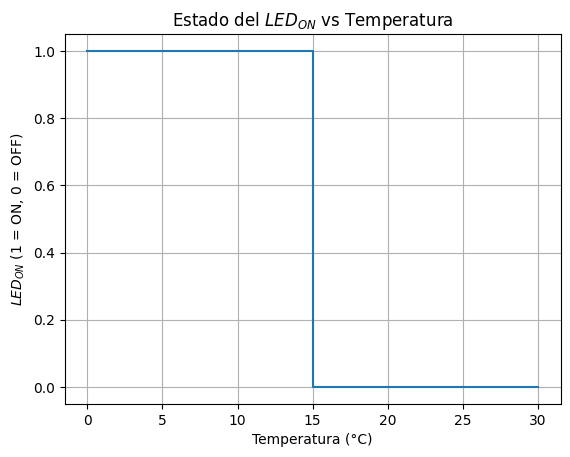

In [25]:
# Visulización simple del comportamiento del sistema
plt.figure()
plt.plot(T, V_sensor, label="Voltaje del sensor ($V_{LM35}$)")
plt.axvline(T_ref, linestyle='--', label="Umbral temperatura 15°C")
plt.xlabel("Temperatura (°C)")
plt.ylabel("Voltaje (V)")
plt.legend()
plt.grid()
plt.show()
#Cuando la temperatura cruza el umbral, el comparador cambiaría su salida

plt.figure()
plt.step(T, LED, where='post') #el LED no cambia de forma continua
plt.xlabel("Temperatura (°C)")
plt.ylabel("$LED_{ON}$ (1 = ON, 0 = OFF)")
plt.title("Estado del $LED_{ON}$ vs Temperatura")
plt.grid()
plt.show()


### 4.2 Esquema interactivo
Una simulación interactiva que permite explorar el comportamiento del sistema en tiempo real. Aqui se puede modificar la temperatura manualmente y observar cómo reacciona el sistema instantáneamente.

**FloatSlider** permite al usuario arrastrar un deslizador para seleccionar un valor de temperatura dentro de un rango predefinido (0 a 30°C en este caso). Cada vez que el valor del deslizador cambia, se dispara una función de actualización.

Interpretación visual:
* Punto verde → LED encendido.
* Punto gris → LED apagado.
* Línea roja → umbral.

In [ ]:
# Creación del elemento visual interactvo 'slider'
slider = widgets.FloatSlider(
    value=25, #valor inicial del slider (arranca en 25°C)
    min=0,
    max=30,
    step=0.5,
    description='Temp (°C)'
)

# Recibe la temperatura y recalcula el voltaje del sensor
# definir una funcion que se va ejecutar cada vez que cambie la temperatura del slider
def update(T):
    clear_output(wait=True) #borra la salida anterior 
    #wait=True espera a tener la nueva salida antes de borrar y mostrar
    V = 0.01 * T
    led = T < T_ref

    print(f"Temperatura: {T:.1f} °C") #formatea el número con 1 decimal
    print(f"Voltaje del sensor: {V:.3f} V")
    print(f"Estado del LED: {'ENCENDIDO' if led else 'APAGADO'}")

    #Crea una figura (fig) y un eje (ax) para graficar
    fig, ax = plt.subplots(figsize=(5,2)) 
    #medida de mi rectangulo 
    ax.set_xlim(0,30)
    ax.set_ylim(0,1)
    #Dibuja una línea vertical en el umbral
    ax.axvline(T_ref, color='blue', linestyle='--', label='Umbral')
    #Dibuja un punto
    ax.plot([T],[0.5],'X',markersize=14, color='pink' if led else 'black')
    #Quita la escala del eje y porque no aporta información
    ax.set_yticks([])

    ax.set_xlabel("Temperatura $T_{LM35}$ (°C)")
    ax.set_title("Indicador visual del LED")
    ax.legend()
    plt.show()

# Actualiza el gráfico visual del LED
#“Conecta” la función update con el slide
#Cada vez que el slider cambie, llama update(T=valor_actual)
widgets.interact(update, T=slider);


interactive(children=(FloatSlider(value=25.0, description='Temp (°C)', max=30.0, step=0.5), Output()), _dom_cl…

## Notas Personales
Queremos un sistema que: 
* Detecte si un líquido frío está en un recipiente
* Si la temperatura baja lo suficiente, que encienda un LED
* Si no el LED permanece apagado

El LM35 es un sensor de temperatura lineal. 
* important A mayor temperatura, mayor voltaje 

# 5. Estudio de Mercado – Análisis mediante Diagramas de Venn
Con el objetivo de identificar la combinación de características con mayor aceptación se realizo un encuesta en donde se analizaron 18 respuestas mediante diagramas de Venn de tres conjuntos y de dos conjuntos

Las variables evaluadas fueron:
- Preferencia por sistema electrónico (Sensor LED)
- Preferencia por material exclusivamente de cristal
- Preferencia por forma del vaso o copa

Cada diagrama permite observar cómo interactúan estas variables y qué combinación presenta mayor coincidencia

## Diagrama 1: Sensor Sí + Cristal Sí + Copa Martini

![Diagrama 1](images/diagrama1.png)

Este diagrama analiza la relación entre innovación tecnológica, material y diseño tipo Martini.
La intersección triple (A ∩ B ∩ C) corresponde a 3 personas.  
Esto significa que 3 encuestados desean simultáneamente:
- Sistema electrónico
- Material 100% cristal
- Forma tipo Martini

La intersección A ∩ B (7 personas) indica que existe una fuerte preferencia por la combinación de sensor y cristal, aunque no necesariamente en forma Martini
La intersección B ∩ C (2 personas) muestra que algunos consumidores valoran el diseño Martini en cristal, pero sin tecnología
No existe intersección A ∩ C sin cristal, lo que sugiere que el material es indispensable en este diseño
Con esto concluimos que el modelo Martini tiene aceptación moderada, pero no lidera la preferencia general

## Diagrama 2: Sensor Sí + Cristal Sí + Vaso Tipo Whisky

![Diagrama 1](images/diagrama2.png)

Este diagrama presenta la mayor intersección triple del estudio
La intersección (A ∩ B ∩ C) corresponde a 5 personas, siendo la combinación con mayor coincidencia entre todas las analizadas
Esto indica que el vaso tipo whisky es el diseño que mejor integra:
- Innovación tecnológica
- Percepción de calidad (cristal)
- Preferencia estética
La intersección B ∩ C (2 personas) muestra que el diseño whisky también es valorado sin sensor, pero en menor proporción


## Diagrama 3: Sensor Sí + Cristal Sí + Copa de Vino

![Diagrama 1](images/diagrama3.png)

La intersección triple es de 2 personas
Aunque existe interés en la combinación completa, el volumen es considerablemente menor en comparación con el modelo whisky


![Diagrama 1](images/diagrama4.png)

![Diagrama 1](images/diagrama5.png)

![Diagrama 1](images/diagrama6.png)

![Diagrama 1](images/diagrama7.png)

![Diagrama 1](images/diagrama8.png)

## 6. Modelación y visualización del producto

Modelar una pieza de cristalería con una función por tramos, visualizarla y calcular numéricamente el material (área de revolución / volumen) mediante aproximaciones numéricas.

### 5.1 Modelación matemática
La idea física implicita es: el perfil $F(x)$ describe el radio del objeto en función de la altura $x$.
Al rotarlo alrededor del eje $x$, obtenemos el volumen del objeto de cristal.

Definimos el perfil como:

$
F(x) =
\begin{cases}
\cos(x) + 0.25, & \text{si } x \in (0,\,1.5707), \\[6pt]
0.25,           & \text{si } x \in (1.57,\,20), \\[6pt]
\sqrt{x-19},              & \text{si } x \in (20,\,25).
\end{cases}
$

El enfoque computacional consiste en:
* Definir $F(x)$ por tramos en Python.
* Visualizar el perfil 2D.
* Visualizar el sólido de revolución (3D).
* Calcular el volumen mediante integración numérica:
$
V = \pi \int_{0}^{25} F(x)^2 \, dx
$


### 5.2 Implementación en python

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simpson
from mpl_toolkits.mplot3d import Axes3D

radio constante es constante ya que estamos haciendo un vaso en este caso de 4 

radio exterior constante 4 (cm). O sea: el vaso externo es un cilindro perfecto.

mi vaso mide 9 de alto, esto crea 2000 puntos desde 0 a 9 cm

Más puntos → mejor aproximación numérica

In [37]:
x = np.linspace(0, 9, 2000)

Esto modela un vaso con:

grosor de pared: 4 − 3.5 = 0.5 (5 mm)

grosor de base: 1.5 cm

In [ ]:
# def R_ext(x):
#     return 4 #cilindro externo radio 4.

# def R_int(x):
#     if x < 1.5: #radio interior = 0 - base maciza de vidrio (no hay hueco)
#         return 0
#     else:
#         return 3.5 #radio interior = 3.5 - cavidad interna cilíndrica

Correcion del anterior codigo de bloque porque no convierte la función en una función matemática vectorial real
Es decir si el primer valor que evalúa es menor que 1.5 (por ejemplo x=0), entonces dice okey es un vector de numeros enteros pero si
despues tenemos un 3.5 dice eso no se puede y lo convierte en un 3 

In [ ]:
def R_int(x):
    return 0.0 if x < 1.5 else 3.5

Rint_vec = np.vectorize(R_int, otypes=[float])
#obliga a que el resultado sea float siempre
#vectorizamos para la malla 2D en 3D 

In [ ]:
def R_ext(x):
    return 4.0  # mejor como float para consistencia

Rext_vec = np.vectorize(R_ext, otypes=[float])
#permite evaluar en arreglos/mallas.

Graficamos el perfil de nuestro vaso, en donde tambien podemos observar el grosor 

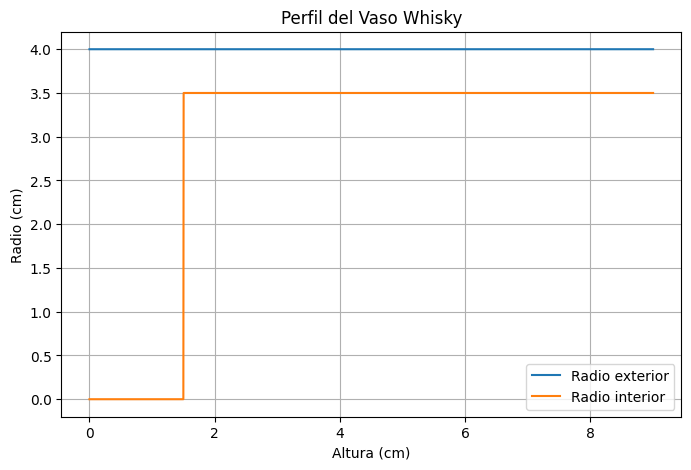

In [ ]:
plt.figure(figsize=(8,5))
y_ext = Rext_vec(x)
#y_ext[i] = R_ext(x[i])
y_int = Rint_vec(x)

# Perfil exterior
#Eje horizontal = x (altura)
#Eje vertical = y_ext (radio)
#Como y_ext es constante, se ve como una línea horizontal a 4 cm
plt.plot(x, y_ext, label="Radio exterior")

# Perfil interior
#muestra su base
plt.plot(x, y_int, label="Radio interior")

plt.xlabel("Altura (cm)")
plt.ylabel("Radio (cm)")
plt.title("Perfil del Vaso Whisky")
plt.legend()
plt.grid()
plt.show()

#### 5.2.5 Visualización del sólido de revolución

Un sólido de revolución se obtiene al tomar el perfil 2D del vaso (radio vs altura) y rotarlo alrededor del eje de la altura \(x\)
En este modelo, para cada altura \(x\) tenemos un radio:

- R_ext(x): radio exterior del vaso  
- R_int(x): radio interior 

Al rotar un radio \(R(x)\) alrededor del eje \(x\), se genera una circunferencia parametrizada por el ángulo $$\theta \in [0, 2\pi]$$

Las ecuaciones paramétricas del sólido son:

$$
y = R(x)\cos(\theta)
$$

$$
z = R(x)\sin(\theta)
$$


Para construir la superficie 3D:
1. Se crea una malla con valores de \(x\) y \(theta) usando meshgrid.
2. Se evalúan \(R_ext\) y \(R_int\) en toda la malla.
3. Se calcula \((y,z)\) con coseno y seno para obtener las coordenadas 3D \((x,y,z)\).
4. Se grafican dos superficies: la exterior y la interior

altura = 𝑥
alrededor de esa altura, dibujas un círculo con radio 𝑅(𝑥)
x controla “en qué altura estoy
theta controla “en qué ángulo del círculo estoy”

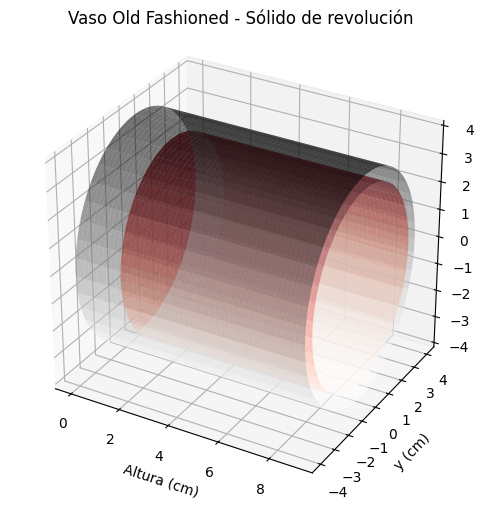

In [ ]:
theta = np.linspace(0, 2*np.pi, 160)  # más puntos  círculo más suave
#Vector de ángulos para dar “una vuelta completa” alrededor del eje

# Malla (theta vs x)
X, Theta = np.meshgrid(x, theta)
#Crea una malla 2D con todas las combinaciones (altura, ángulo)
#Esto permite construir coordenadas 3D para una superficie

# Radios sobre la malla
#Evalua el radio exterior en cada punto de altura (en toda la malla)
#Como el radio exterior es constante sale una matriz llena de 4
R_ext_3D = Rext_vec(X)
R_int_3D = Rint_vec(X)
#Evalúa el radio interior por tramos (0 abajo, 3.5 arriba)

# Enmascarar interior donde no hay cavidad (radio = 0) para que no se dibuje
R_int_3D = np.where(R_int_3D > 0, R_int_3D, np.nan)

# Conversión a coordenadas 3D (sólido de revolución)
Y_ext = R_ext_3D * np.cos(Theta)
Z_ext = R_ext_3D * np.sin(Theta)

Y_int = R_int_3D * np.cos(Theta)
Z_int = R_int_3D * np.sin(Theta)

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

#Dibuja dos “pieles” (exterior e interior), el vaso real es el volumen entre ambas
# Exterior
ax.plot_surface(X, Y_ext, Z_ext, cmap='Greys', alpha=0.55, linewidth=0)

# Interior (solo donde existe hueco)
ax.plot_surface(X, Y_int, Z_int, cmap='Reds', alpha=0.80, linewidth=0)

ax.set_xlabel("Altura (cm)")
ax.set_ylabel("y (cm)")
ax.set_zlabel("z (cm)")
ax.set_title("Vaso Whisky - Sólido de revolución")

# Para que no se vea aplastado (misma escala en ejes)
Rmax = np.nanmax(R_ext_3D)
ax.set_box_aspect((np.ptp(x), 2*Rmax, 2*Rmax))

plt.show()

#### 5.2.6 Aproximación numérica del volumen

In [60]:
y_ext = Rext_vec(x)
y_int = Rint_vec(x)

In [61]:
# Asegurarnos que x esté bien definido
x = np.linspace(0, 9, 2000)

# Cálculo del volumen exterior
V_ext = np.pi * simpson(y_ext**2, x=x)

# Cálculo del volumen interior
V_int = np.pi * simpson(y_int**2, x=x)

# Volumen del material del vaso
V_vidrio = V_ext - V_int

print("Volumen exterior:", round(V_ext, 2), "cm³")
print("Volumen interior:", round(V_int, 2), "cm³")
print("Volumen del vidrio:", round(V_vidrio, 2), "cm³")

Volumen exterior: 452.39 cm³
Volumen interior: 288.55 cm³
Volumen del vidrio: 163.84 cm³
